In [1]:
if(!require("bootnet")){
  install.packages("bootnet")
  library("bootnet")
}

if(!require("qgraph")){
  install.packages("qgraph")
  library("qgraph")
}


Loading required package: bootnet
Loading required package: ggplot2
Registered S3 method overwritten by 'R.oo':
  method        from       
  throw.default R.methodsS3
Registered S3 methods overwritten by 'car':
  method                          from
  influence.merMod                lme4
  cooks.distance.influence.merMod lme4
  dfbeta.influence.merMod         lme4
  dfbetas.influence.merMod        lme4
Registered S3 methods overwritten by 'BDgraph':
  method    from
  plot.sim  huge
  print.sim huge
This is bootnet 1.2.4
For questions and issues, please see github.com/SachaEpskamp/bootnet.
Loading required package: qgraph


In [2]:
Data = readRDS('NetworkData.rds')

In [3]:
# pairwise Markov random field
# When data are multivariate normal, such a conditional independence would correspond to a partial correlation being equal to zero. 
# multivariate normal density: Gaussian graphical model: edges: partial correlation coefficients
# estimate of the covariance matrix as input

# One problem: small N (10 node network = 45 pairs to be estimated) 
# Solution: Regularization LASSO

# dataset of 359 women enrolled in community-based substance abuse treatment programs across the United States

#1. Show a Network without regularization
NetworkFull <- estimateNetwork(Data, default = "pcor")

Estimating Network. Using package::function:
  - qgraph::qgraph(..., graph = 'pcor') for network computation
  - qgraph::cor_auto for correlation computation
    - using lavaan::lavCor
  - psych::corr.p for significance thresholding


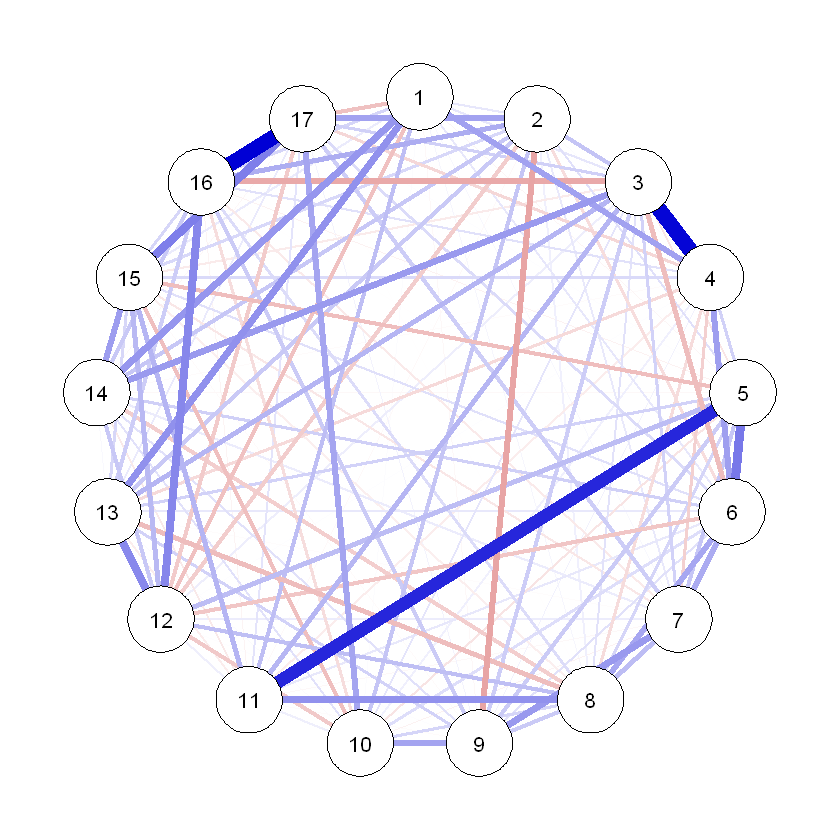

In [4]:
plot(NetworkFull, layout = "circular" , labels = T)

In [6]:
# How many edges? 
sum(NetworkFull$graph > 0)/2


[1] 93

In [7]:
# One problem: small N for this amount of free parameters (edges) to estimate
# Solution: Regularization LASSO

Estimating Network. Using package::function:
  - qgraph::qgraph(..., graph = 'pcor') for network computation
  - qgraph::cor_auto for correlation computation
    - using lavaan::lavCor
  - psych::corr.p for significance thresholding


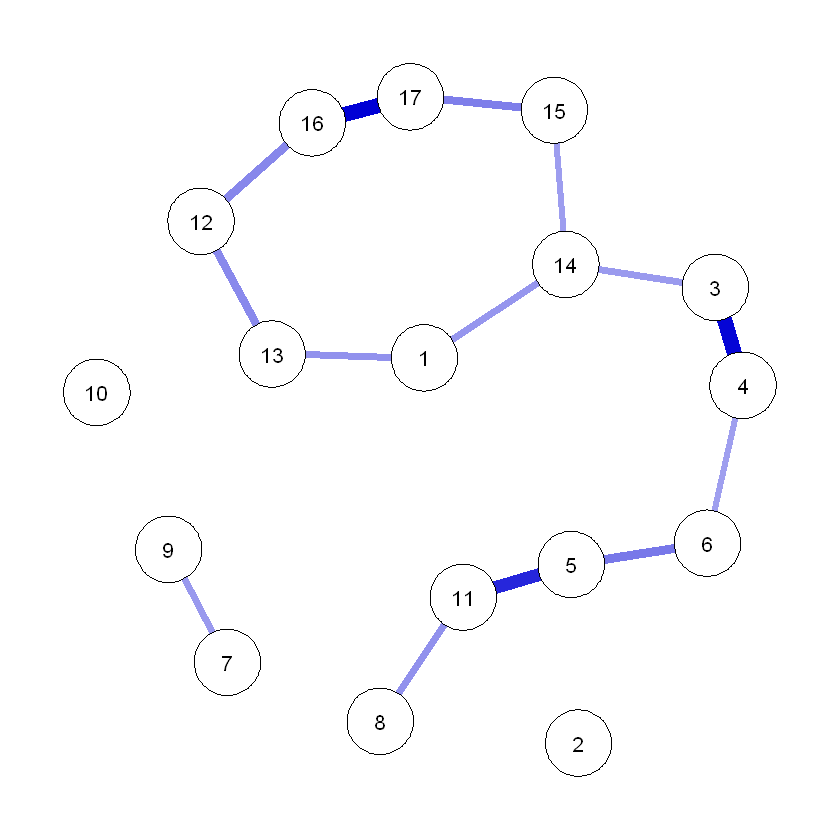

In [9]:
#2.Regularize the model:
#First : use bonferroni correction when estimating partical correlations, only use edges surviving that

NetworkBonf <- estimateNetwork(Data, default = "pcor", threshold = 'bonferroni', alpha = 0.05)
plot(NetworkBonf)

Estimating Network. Using package::function:
  - qgraph::EBICglasso for EBIC model selection
    - using glasso::glasso
  - qgraph::cor_auto for correlation computation
    - using lavaan::lavCor
Warning message in EBICglassoCore(S = S, n = n, gamma = gamma, penalize.diagonal = penalize.diagonal, :
"A dense regularized network was selected (lambda < 0.1 * lambda.max). Recent work indicates a possible drop in specificity. Interpret the presence of the smallest edges with care. Setting threshold = TRUE will enforce higher specificity, at the cost of sensitivity."

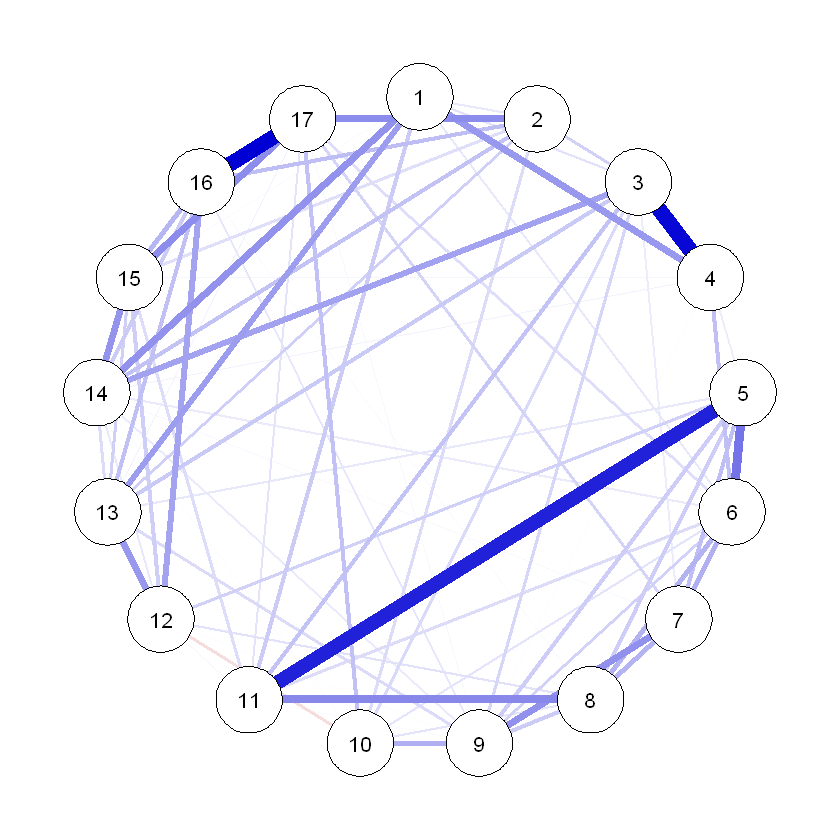

In [11]:
# Now do porper Lasso regression
NetworkLasso <- estimateNetwork(Data, default = "EBICglasso")
plot(NetworkLasso, layout = "circular" , labels = T)

In [12]:
# looks a lot better, at least almost all negative edges gone
# How many edges?
sum(NetworkLasso$graph > 0)/2

[1] 77

In [13]:
# which lambda was chosen? 
# EBIC is extended Bayesian information criteria
MinEBIC = which.min(NetworkLasso$results$ebic)
NetworkLasso$results$lambda[MinEBIC]

[1] 0.05490918

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0.000000,14.543176,7.815801,5.512190,13.468679,14.591869,21.698259,15.691390,21.573788,22.755363,10.905948,11.391921,5.833191,5.224655,10.542015,14.821620,15.492793
14.543176,0.000000,12.308587,14.612198,24.431638,22.056322,18.165942,25.786284,21.333650,14.218762,21.868907,13.403206,11.982817,9.318521,9.907932,7.193203,4.957154
7.815801,12.308587,0.000000,2.303611,12.123051,11.383290,18.489681,14.345763,13.757987,14.939561,9.560321,16.252136,10.693406,6.115805,11.433166,17.041749,16.383944
5.512190,14.612198,2.303611,0.000000,13.183717,9.079679,16.186069,16.588871,16.061598,17.243173,11.863932,16.904111,11.345381,8.419417,13.736777,19.345361,18.687555
13.468679,24.431638,12.123051,13.183717,0.000000,4.104039,8.978314,7.348172,11.298117,18.413004,2.562730,12.362593,17.921323,18.238856,19.101439,18.572596,20.808646
14.591869,22.056322,11.383290,9.079679,4.104039,0.000000,7.106391,7.509192,12.310092,19.424979,6.666769,16.466632,20.425060,17.499095,22.049947,19.335218,17.099168
21.698259,18.165942,18.489681,16.186069,8.978314,7.106391,0.000000,7.620342,5.203701,12.318589,11.541045,21.340908,21.131201,23.476928,18.159567,15.444838,13.208789
15.691390,25.786284,14.345763,16.588871,7.348172,7.509192,7.620342,0.000000,11.036212,18.151099,4.785442,18.914319,21.524581,20.461568,21.324151,23.065180,20.829130
21.573788,21.333650,13.757987,16.061598,11.298117,12.310092,5.203701,11.036212,0.000000,7.114887,13.860847,21.486230,15.927500,19.873792,21.327274,18.612545,16.376496
22.755363,14.218762,14.939561,17.243173,18.413004,19.424979,12.318589,18.151099,7.114887,0.000000,20.975734,16.607439,20.486087,19.529748,14.212387,11.497658,9.261609


Note: z-scores are shown on x-axis rather than raw centrality indices.


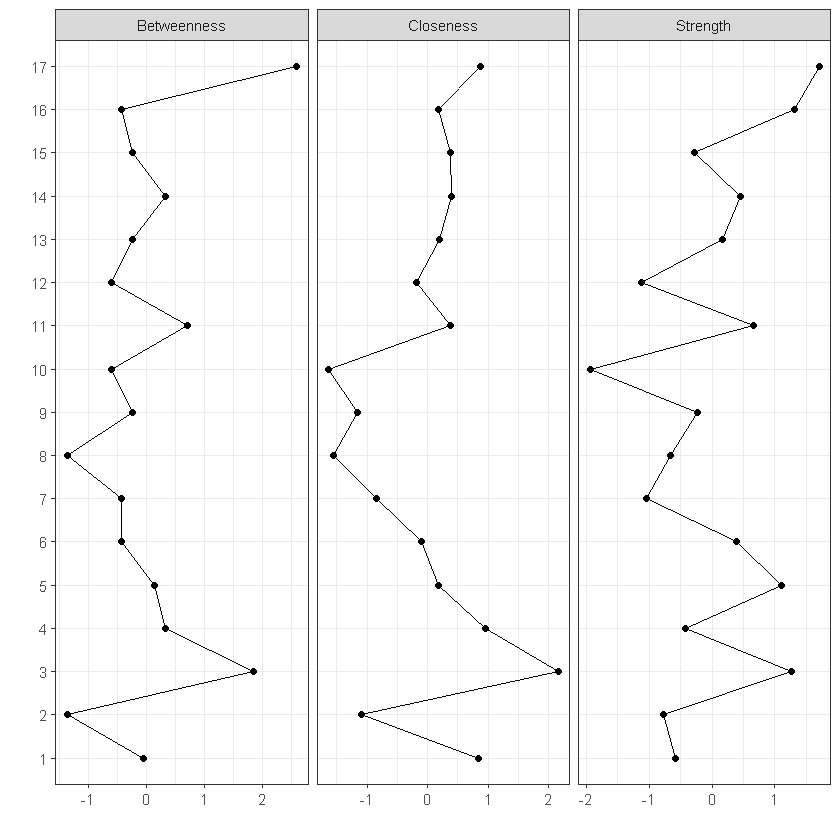

In [14]:
#3 Calculate the network properties
# which symptoms are most relevant?

# (A) Node strength / Degree: sum of all edges of a node with all other directly connected nodes of the network
# (B) Closeness: how strongly a node is indirectly connected to other nodes in the network?
# sum of all the shortest paths between one node and all other nodes in the network
# C) betweenness looks at how many of the shortest paths between two nodes go
# through the node in question; the higher the betweenness, the more important a
# node is in connecting other node
centrality(NetworkLasso)
centralityPlot(NetworkLasso,include=c("Betweenness","Closeness","Strength"))

In [16]:
#4. Assess the accuracy of edge-weights
bootNetworkLasso <- bootnet(NetworkLasso, nBoots = 100, nCores = 4)

#sizable bootstrapped CIs around the estimated edge-weights, indicating that
#many edge-weights likely do not significantly differ from one-another. The
#generally large bootstrapped CIs imply that interpreting the order of most
#edges in the network should be done with care. 16 - 17, 3 - 4, 5 - 11 

Note: bootnet will store only the following statistics:  edge, strength, outStrength, inStrength
Estimating sample network...
Estimating Network. Using package::function:
  - qgraph::EBICglasso for EBIC model selection
    - using glasso::glasso
  - qgraph::cor_auto for correlation computation
    - using lavaan::lavCor
Warning message in EBICglassoCore(S = S, n = n, gamma = gamma, penalize.diagonal = penalize.diagonal, :
"A dense regularized network was selected (lambda < 0.1 * lambda.max). Recent work indicates a possible drop in specificity. Interpret the presence of the smallest edges with care. Setting threshold = TRUE will enforce higher specificity, at the cost of sensitivity."Bootstrapping...
Computing statistics...


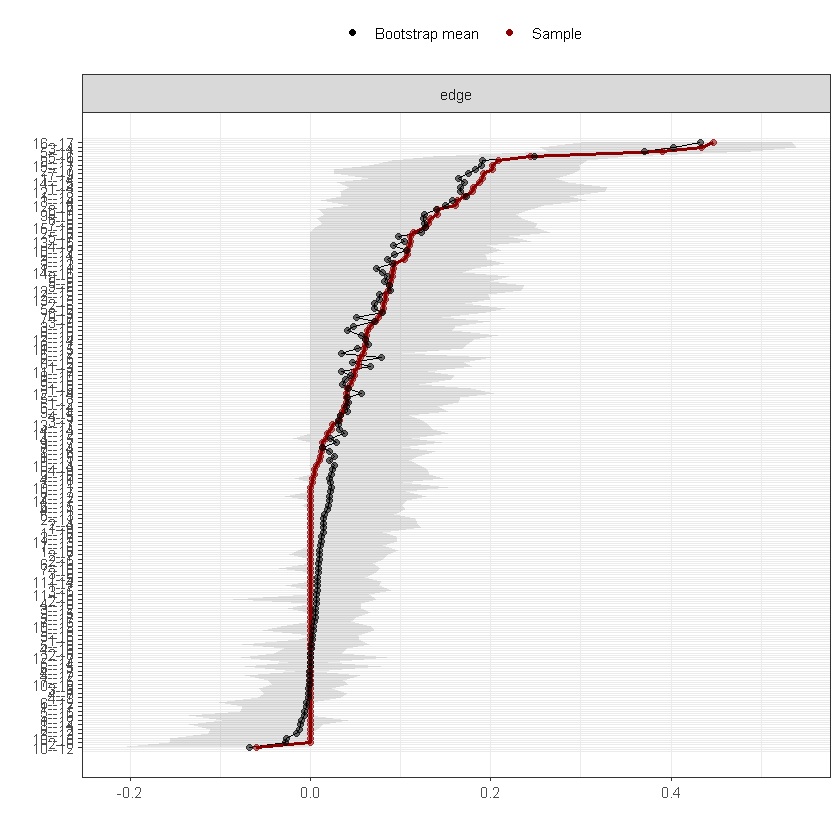

In [17]:
plot(bootNetworkLasso, labels = TRUE, order = "sample")

In [18]:
# Centrality 
# C S (cor = 0.7) represent the maximum proportion of cases that can be dropped,
#such that with 95 % probability the correlation between original centrality
#indices and centrality of networks based on subsets is 0.7 or higher. 0.5 is ok.
bootNetworkLasso2 <- bootnet(NetworkLasso, nBoots = 100, type = "case", nCores = 4)


Note: bootnet will store only the following statistics:  edge, strength, outStrength, inStrength
Estimating sample network...
Estimating Network. Using package::function:
  - qgraph::EBICglasso for EBIC model selection
    - using glasso::glasso
  - qgraph::cor_auto for correlation computation
    - using lavaan::lavCor
Warning message in EBICglassoCore(S = S, n = n, gamma = gamma, penalize.diagonal = penalize.diagonal, :
"A dense regularized network was selected (lambda < 0.1 * lambda.max). Recent work indicates a possible drop in specificity. Interpret the presence of the smallest edges with care. Setting threshold = TRUE will enforce higher specificity, at the cost of sensitivity."Bootstrapping...
Computing statistics...


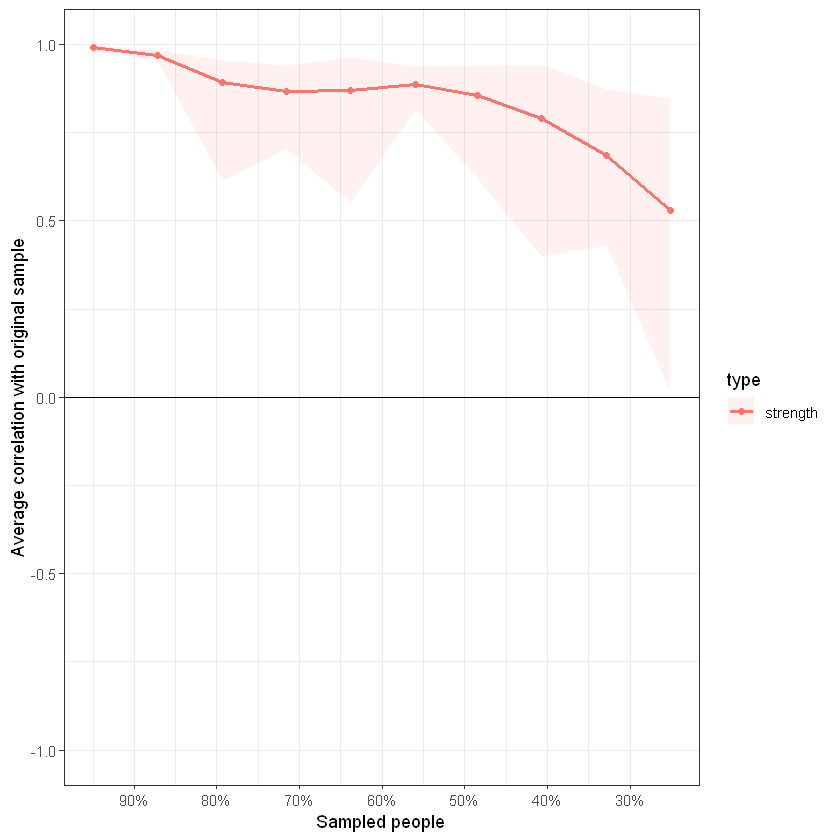

In [20]:
plot(bootNetworkLasso2)


In [21]:
corStability(bootNetworkLasso2)

=== Correlation Stability Analysis === 

Sampling levels tested:
   nPerson Drop%  n
1       90  74.9 10
2      118  67.1 13
3      146  59.3 16
4      174  51.5 11
5      201  44.0 11
6      229  36.2  7
7      257  28.4  8
8      285  20.6  8
9      313  12.8  7
10     341   5.0  9

Maximum drop proportions to retain correlation of 0.7 in at least 95% of the samples:

edge: 0.671 
  - For more accuracy, run bootnet(..., caseMin = 0.593, caseMax = 0.749) 

strength: 0.44 
  - For more accuracy, run bootnet(..., caseMin = 0.362, caseMax = 0.515) 

Accuracy can also be increased by increasing both 'nBoots' and 'caseN'.

In [23]:
#5 Compare if edges differ significantly 
# here we take a look at the node strenght
differenceTest(nodeootNetworkLasso, 3, 17, "strength")
differenceTest(bootNetworkLasso, 1, 16, "strength")



Expected significance level given number of bootstrap samples is approximately: 0.048


id1,id2,measure,lower,upper,significant
3,17,strength,-0.2510557,0.3530177,FALSE


Expected significance level given number of bootstrap samples is approximately: 0.051


id1,id2,measure,lower,upper,significant
1,16,strength,0.07924667,0.5827234,TRUE


Expected significance level given number of bootstrap samples is approximately: 0.049


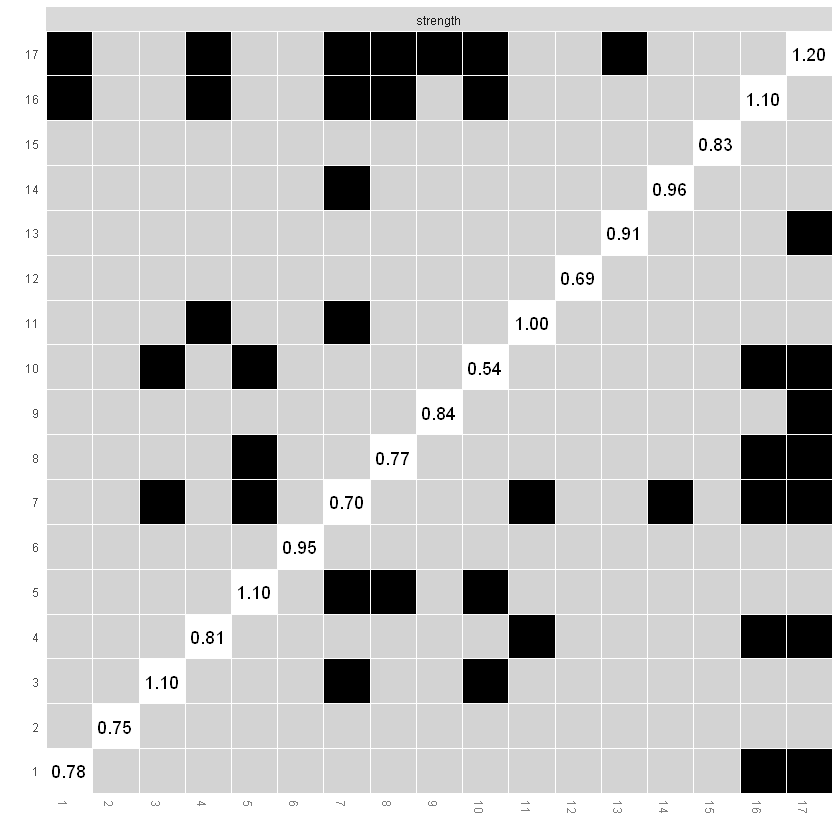

In [24]:
plot(bootNetworkLasso, "strength")
#diagnoal is node strength

Expected significance level given number of bootstrap samples is approximately: 0.05


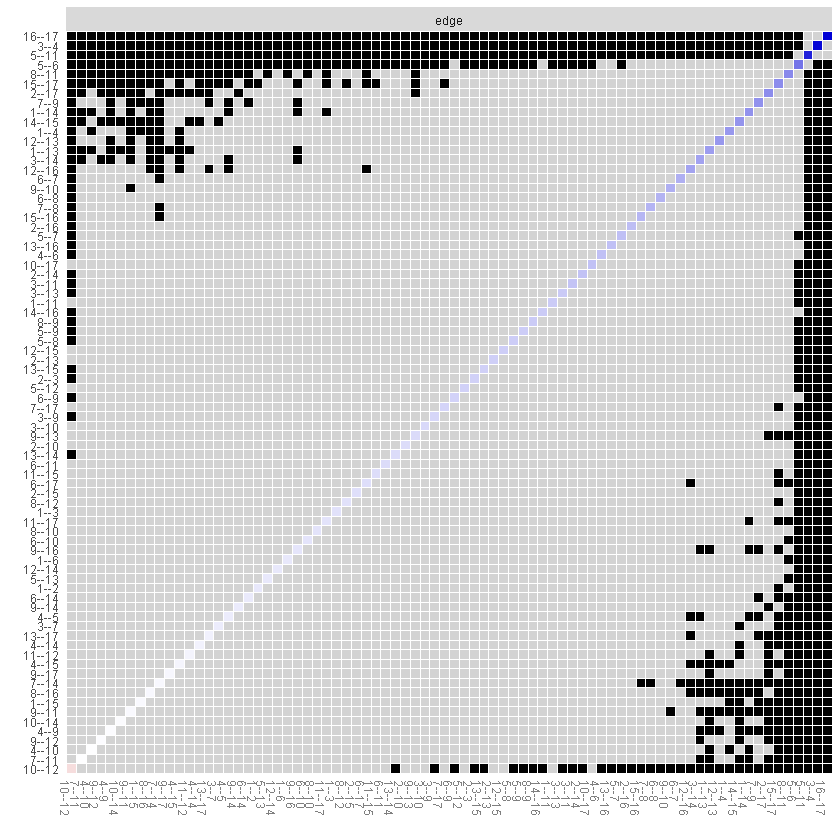

In [25]:
# Edges differ significantly?
# For example, the following code plots the difference tests of node strength between all pairs of edge-weights:
plot(bootNetworkLasso, "edge", plot = "difference", onlyNonZero = TRUE, order = "sample")

